# Amazon Books Review Analysis

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

## Reading Data from file

In [6]:
data = pd.read_csv("sample.csv")

# **EDA**

## Distribution of Books in Market based on Genre

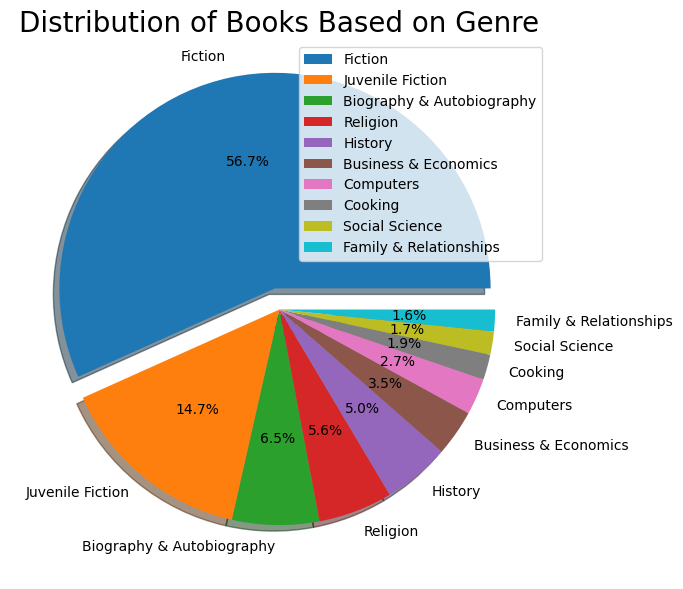

In [7]:
plt.figure(figsize=(7,7))
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(data['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Books Based on Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## Most frequent Words in over 3 rated Reviews

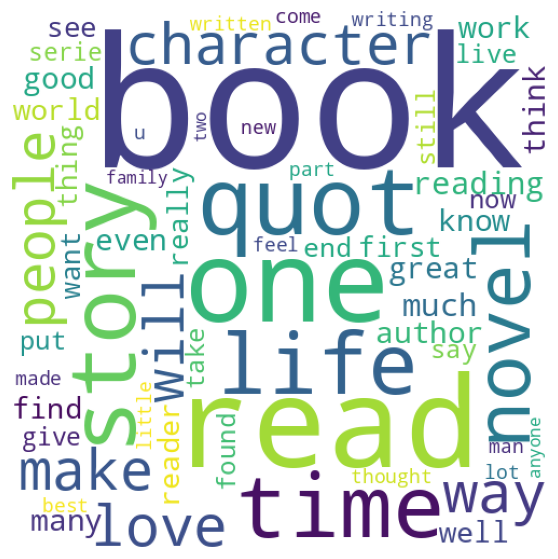

In [9]:

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(spam_wc)

## Most Reviewed Books

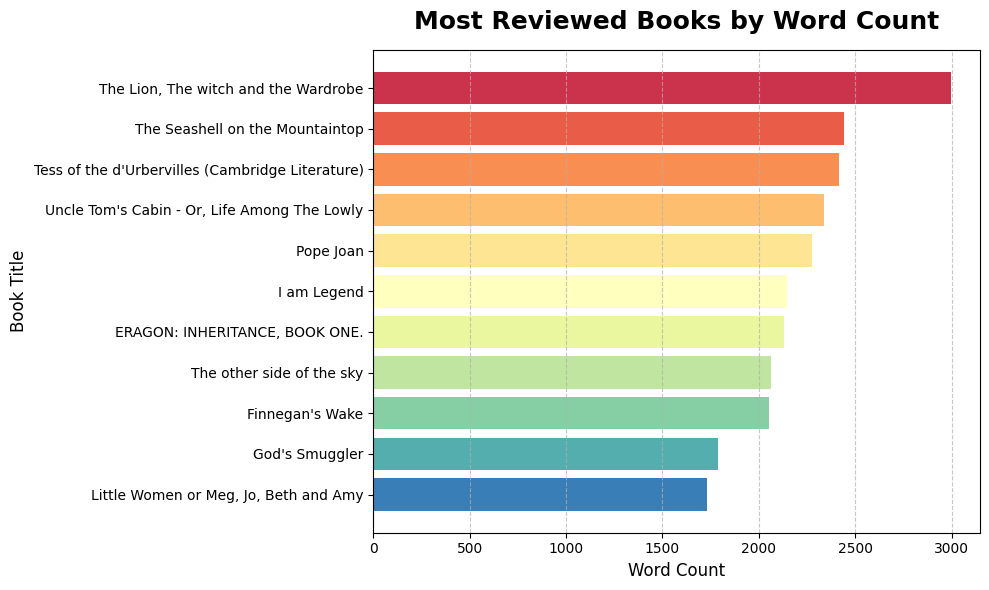

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

cou = data[data['word_count'] > 1707][['Title', 'word_count']].sort_values(by='word_count', ascending=False)

plt.figure(figsize=(10, 6))
colors = sns.color_palette('Spectral', n_colors=len(cou))
bars = plt.barh(cou['Title'], cou['word_count'], color=colors)

plt.title('Most Reviewed Books by Word Count', fontsize=18, weight='bold', pad=15)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Book Title', fontsize=12)

plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Highest Rated Books with over 4000 ratings each Book

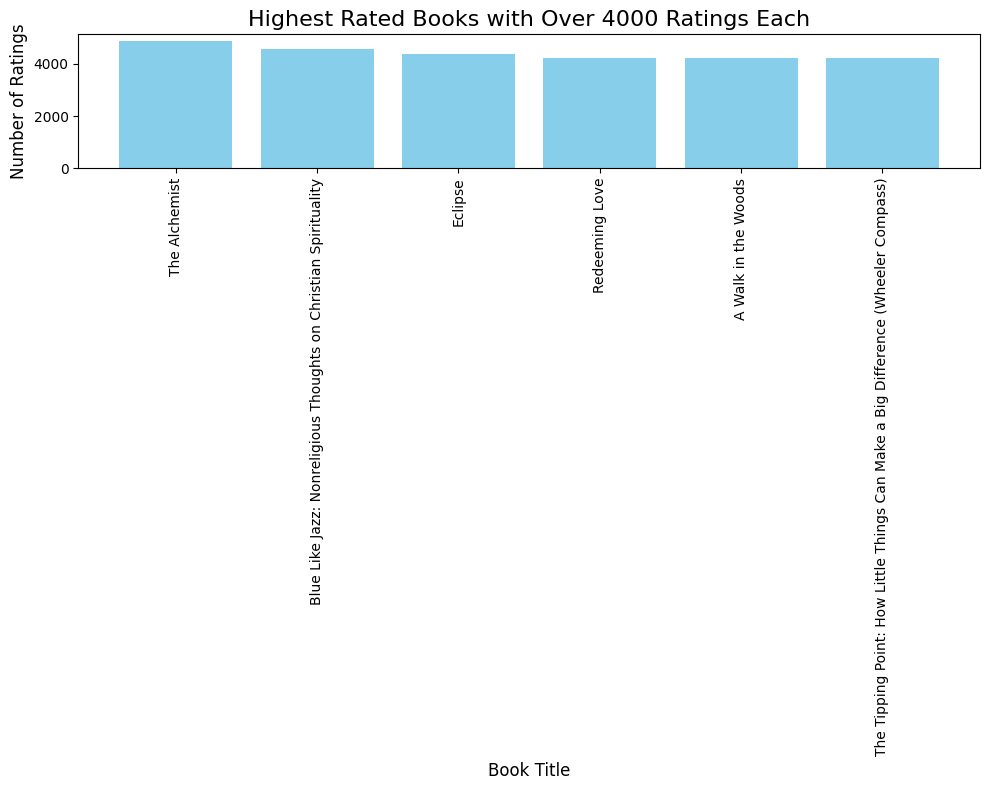

In [11]:
import matplotlib.pyplot as plt

# Lọc và sắp xếp dữ liệu
rating_counts = data[data['ratingsCount'] > 4000][['Title', 'ratingsCount']].drop_duplicates()
rating_counts = rating_counts.sort_values(by='ratingsCount', ascending=False)

# Tạo biểu đồ
plt.figure(figsize=(10, 8))
plt.bar(rating_counts['Title'], rating_counts['ratingsCount'], color='skyblue')

# Xoay nhãn trục x cho dễ đọc
plt.xticks(rotation=90, ha='center', fontsize=10)

# Thêm tiêu đề và nhãn
plt.title('Highest Rated Books with Over 4000 Ratings Each', fontsize=16)
plt.xlabel('Book Title', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)

# Giảm khoảng trắng
plt.tight_layout()
plt.show()


## In which Genres readers give Positive and Negative Ratings

<ipython-input-15-056e090daf56>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10['avg_score'], y=top_10['categories'], palette='Greens_r', ax=axs[0])
<ipython-input-15-056e090daf56>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10['avg_score'], y=bottom_10['categories'], palette='Reds', ax=axs[1])


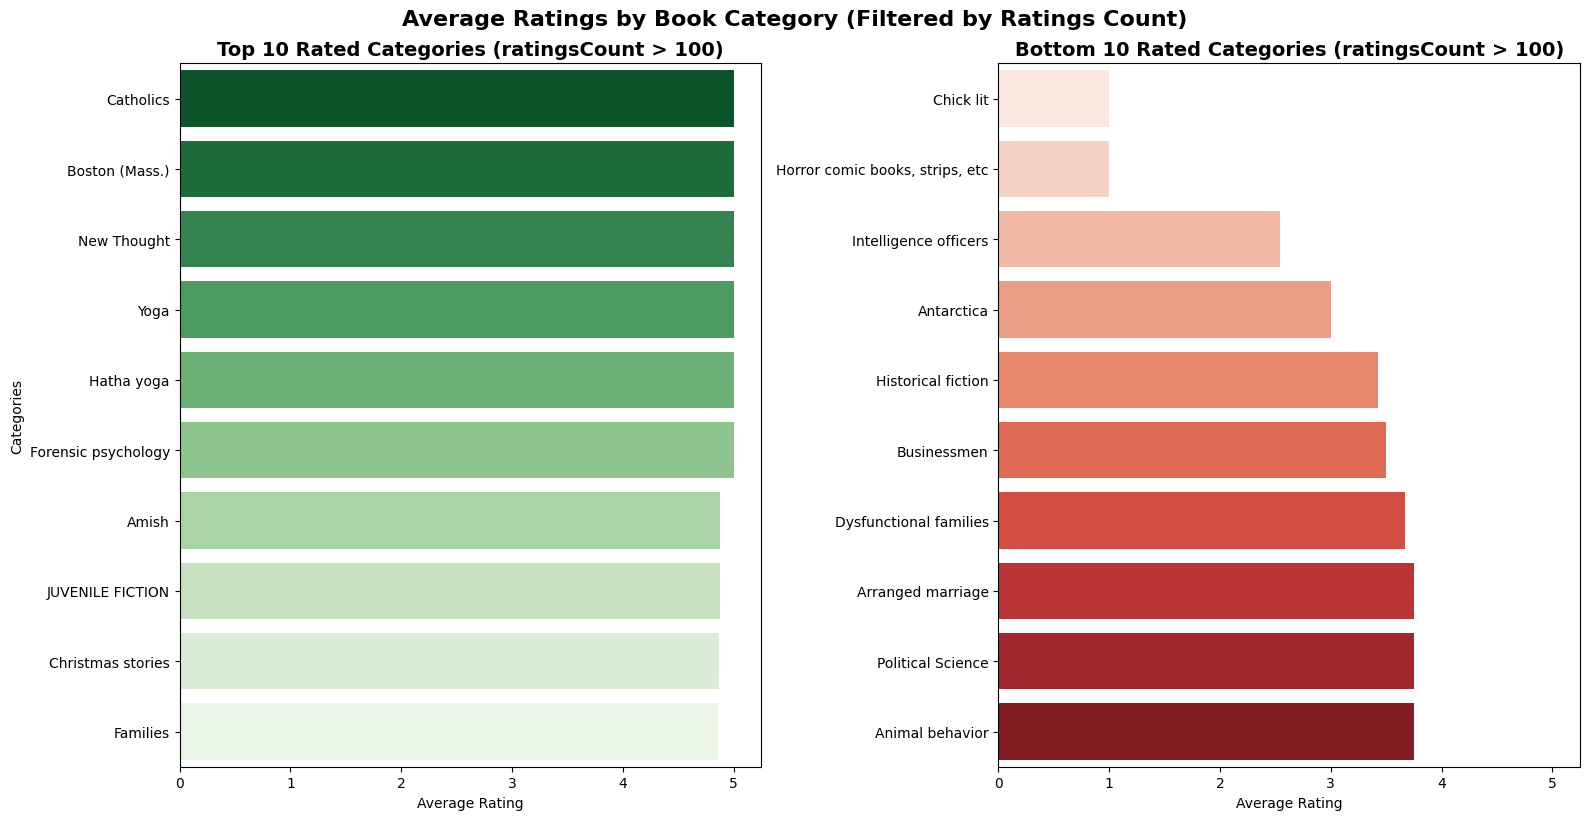

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển về kiểu số
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')
data['ratingsCount'] = pd.to_numeric(data['ratingsCount'], errors='coerce')

# Bỏ các dòng thiếu điểm số
numeric_data = data.dropna(subset=['review/score'])

# Nhóm theo categories, tính điểm trung bình và tổng số rating
category_stats = (
    numeric_data.groupby('categories')
    .agg(avg_score=('review/score', 'mean'),
         total_ratings=('ratingsCount', 'sum'))
    .reset_index()
)

# Chỉ giữ categories có tổng ratingsCount > 50
filtered_categories = category_stats[category_stats['total_ratings'] > 100]

# Top 10 và Bottom 10
top_10 = filtered_categories.sort_values('avg_score', ascending=False).head(10)
bottom_10 = filtered_categories.sort_values('avg_score').head(10)

# Vẽ biểu đồ
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True)

sns.barplot(x=top_10['avg_score'], y=top_10['categories'], palette='Greens_r', ax=axs[0])
axs[0].set_title('Top 10 Rated Categories (ratingsCount > 100)', fontsize=14, weight='bold')
axs[0].set_xlabel('Average Rating')
axs[0].set_ylabel('Categories')

sns.barplot(x=bottom_10['avg_score'], y=bottom_10['categories'], palette='Reds', ax=axs[1])
axs[1].set_title('Bottom 10 Rated Categories (ratingsCount > 100)', fontsize=14, weight='bold')
axs[1].set_xlabel('Average Rating')
axs[1].set_ylabel('')

plt.tight_layout()
plt.suptitle('Average Ratings by Book Category (Filtered by Ratings Count)', fontsize=16, weight='bold', y=1.02)
plt.show()


## Top 10 Authors with Highest Ratings

<ipython-input-13-eebbe970cf2b>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors['avg_score'], y=top_authors['authors'], palette='viridis')


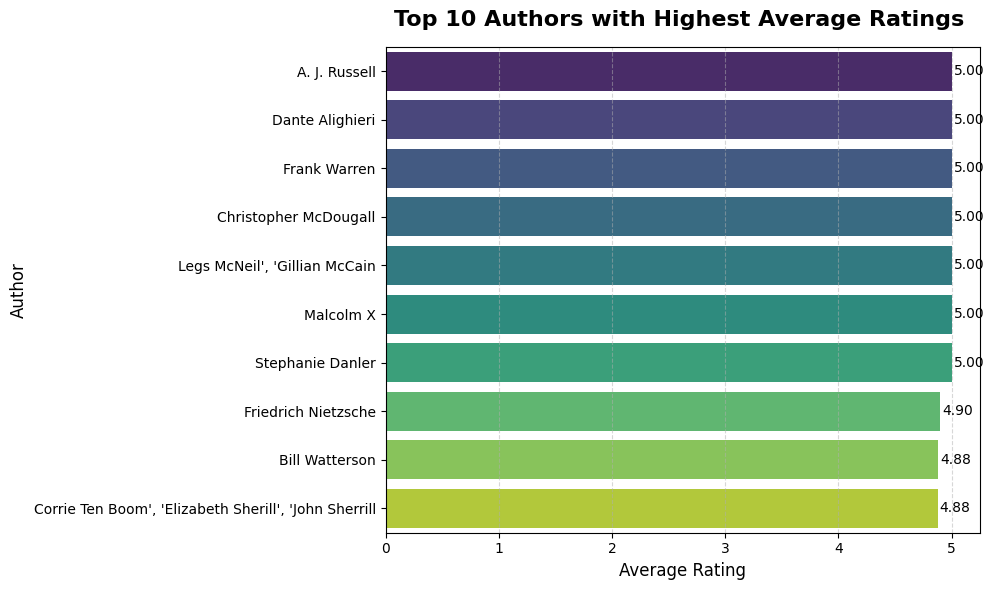

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển về dạng số
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')
data['ratingsCount'] = pd.to_numeric(data['ratingsCount'], errors='coerce')

# Nhóm theo tác giả
author_stats = (
    data.groupby('authors')
    .agg(avg_score=('review/score', 'mean'),
         total_ratings=('ratingsCount', 'sum'))
    .reset_index()
)

# Chỉ giữ các tác giả có tổng ratingsCount > 50
filtered_authors = author_stats[author_stats['total_ratings'] > 1000]

# Lấy top 10 tác giả theo điểm trung bình
top_authors = filtered_authors.sort_values('avg_score', ascending=False).head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors['avg_score'], y=top_authors['authors'], palette='viridis')

plt.title('Top 10 Authors with Highest Average Ratings ', fontsize=16, weight='bold', pad=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Author', fontsize=12)

for i, v in enumerate(top_authors['avg_score']):
    plt.text(v + 0.02, i, f"{v:.2f}", va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [9]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
0,Summer Sisters : A Novel,5.0,This was the best Judy Blume book I've ever re...,Judy Blume,Fiction,61.0,111
1,Fugitive from the Cubicle Police,5.0,Another hilarious Dilbert compilation. With bo...,Scott Adams,Humor,9.0,100
2,"Just Above a Whisper (Tucker Mills Trilogy, Bo...",5.0,I have all three books in the Tucker Mills Tri...,Lori Wick,Fiction,12.0,82
3,Norstrilia,4.0,There was a time when science fiction was a ve...,Cordwainer Smith,Fiction,3.0,477
4,The Perfect Husband,3.0,"I read Perfect Husband on my Kindle, and since...",Lisa Gardner,Fiction,27.0,335


## Top 10 Authors with lowest Ratings

<ipython-input-17-20d8c8434583>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10['avg_score'], y=bottom_10['categories'], palette='Reds')


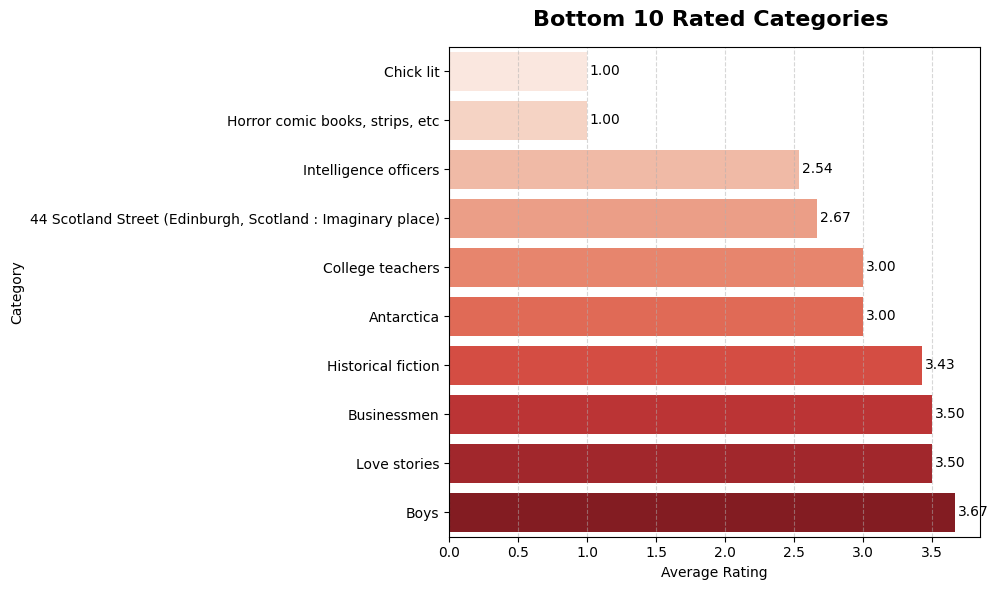

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển dữ liệu về dạng số
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')
data['ratingsCount'] = pd.to_numeric(data['ratingsCount'], errors='coerce')

# Bỏ những dòng không có review/score
numeric_data = data.dropna(subset=['review/score'])

# Nhóm theo categories
category_stats = (
    numeric_data.groupby('categories')
    .agg(avg_score=('review/score', 'mean'),
         total_ratings=('ratingsCount', 'sum'))
    .reset_index()
)

# Chỉ giữ các thể loại có ratingsCount > 50
filtered_categories = category_stats[category_stats['total_ratings'] > 50]

# Lấy 10 thể loại có điểm trung bình thấp nhất
bottom_10 = filtered_categories.sort_values('avg_score').head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10['avg_score'], y=bottom_10['categories'], palette='Reds')

plt.title('Bottom 10 Rated Categories ', fontsize=16, weight='bold', pad=15)
plt.xlabel('Average Rating')
plt.ylabel('Category')

# Gắn nhãn điểm số
for i, v in enumerate(bottom_10['avg_score']):
    plt.text(v + 0.02, i, f"{v:.2f}", va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Number of Books written by each Author

<ipython-input-14-f1a83264ef7f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors_count.values, y=top_authors_count.index, palette='crest')


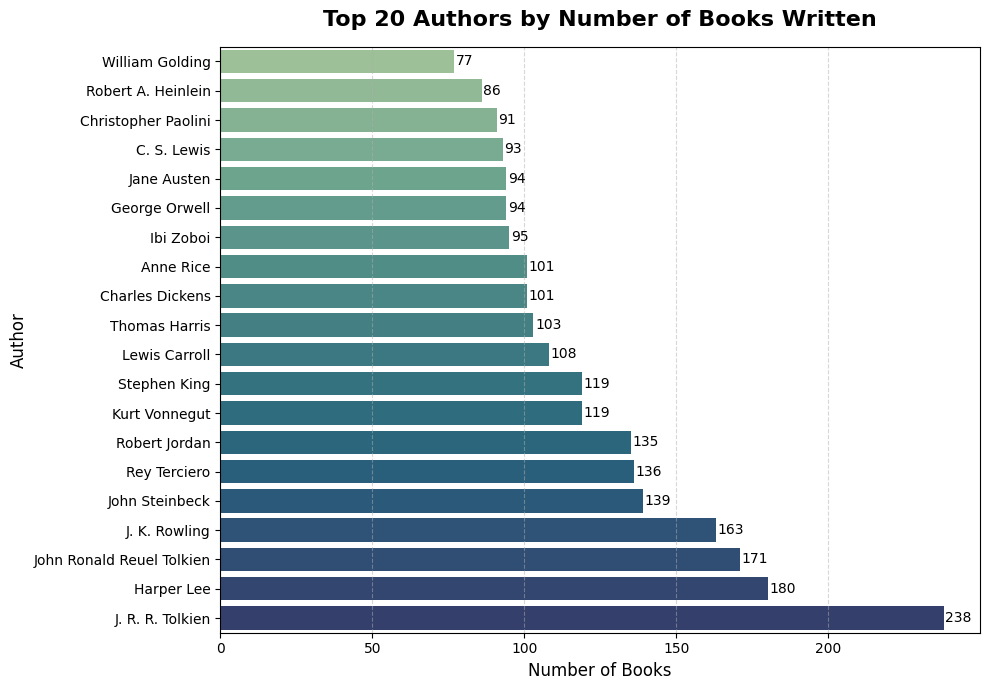

In [14]:
top_authors_count = data['authors'].value_counts().head(20).sort_values()

plt.figure(figsize=(10, 7))
sns.barplot(x=top_authors_count.values, y=top_authors_count.index, palette='crest')

plt.title('Top 20 Authors by Number of Books Written', fontsize=16, weight='bold', pad=15)
plt.xlabel('Number of Books', fontsize=12)
plt.ylabel('Author', fontsize=12)

for i, v in enumerate(top_authors_count.values):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:
print(data['review/score'].value_counts())


review/score
5.0    13185
4.0     4272
3.0     1954
1.0     1476
2.0     1113
Name: count, dtype: int64


In [13]:
import plotly.graph_objects as go

colors = ['gold', 'mediumturquoise', 'brown', 'lightcoral', 'lightblue']

# Đếm và tính phần trăm
counts = data['review/score'].value_counts()
labels = counts.index.astype(str)
values = counts.values  # giữ nguyên số lượng, Plotly sẽ tự tính % nếu ta chọn textinfo='percent'

# Tạo biểu đồ donut
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='percent',  # chỉ hiển thị % trên biểu đồ
    textfont_size=20,
    marker=dict(colors=colors, line=dict(color='white', width=0.1))
)

fig.show()


# **Sentiment Analysis**

In [18]:
# 1. Lấy review text và score
df = data.copy()

# 2. Tạo label cảm xúc từ score
def convert_score_to_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

df['Sentiment'] = df['review/score'].apply(convert_score_to_sentiment)






In [15]:
df

,Title,review/score,review/text,authors,categories,ratingsCount,word_count,Sentiment
0,Summer Sisters : A Novel,5.0,This was the best Judy Blume book I've ever re...,Judy Blume,Fiction,61.0,111,positive
1,Fugitive from the Cubicle Police,5.0,Another hilarious Dilbert compilation. With bo...,Scott Adams,Humor,9.0,100,positive
2,"Just Above a Whisper (Tucker Mills Trilogy, Bo...",5.0,I have all three books in the Tucker Mills Tri...,Lori Wick,Fiction,12.0,82,positive
3,Norstrilia,4.0,There was a time when science fiction was a ve...,Cordwainer Smith,Fiction,3.0,477,positive
4,The Perfect Husband,3.0,"I read Perfect Husband on my Kindle, and since...",Lisa Gardner,Fiction,27.0,335,neutral
...,...,...,...,...,...,...,...,...
21995,Gideon's Spies: The Secret History of the Mossad,4.0,"Like Ostrovsky's books, this is a very good on...",Gordon Thomas,History,7.0,61,positive
21996,A tree grows in Brooklyn: A novel (Armed Servi...,5.0,I absolutely love this book! It definitely des...,Molly Guptill Manning,History,24.0,120,positive
21997,Teach Yourself C++,4.0,I'll be brief :1)This book assumes you know ho...,Herbert Schildt,Computers,1.0,259,positive
21998,Harry Potter & the Prisoner of Azkaban,5.0,My husband &amp; I both loved these books. At ...,Lisa S. Brenner,Literary Criticism,1.0,49,positive


## Distribution of Negative, Neutral and Positive Sentiment in whole corpus

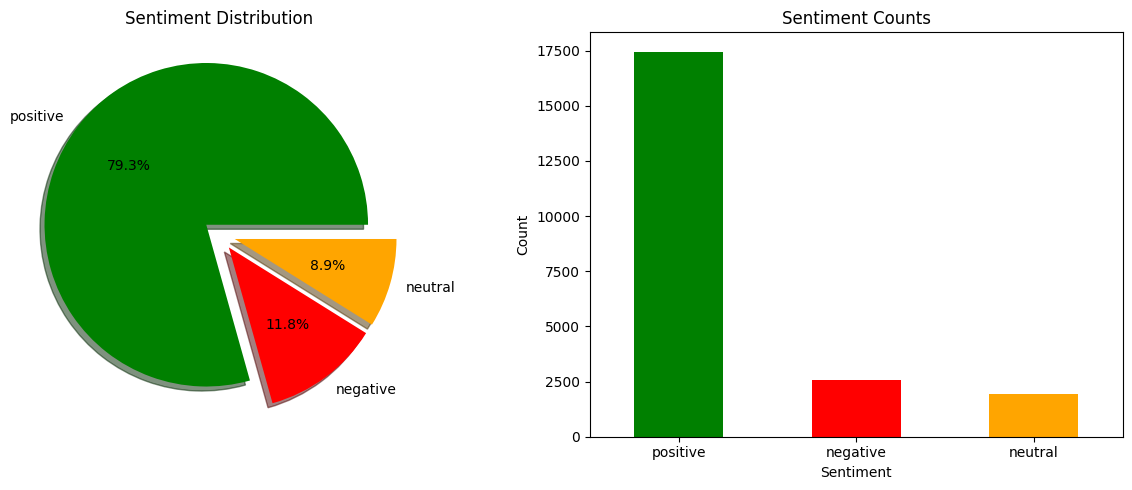

In [16]:
import matplotlib.pyplot as plt

# Tạo figure với 1 dòng 2 cột
plt.figure(figsize=(12, 5))

# --- Plot 1: Pie Chart ---
plt.subplot(1, 2, 1)
labels = ['positive', 'negative', 'neutral']
colors = ['green', 'red', 'orange']
explode = (0.1, 0.1, 0.1)

sizes = df['Sentiment'].value_counts().reindex(labels)  # đảm bảo đúng thứ tự

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')

# --- Plot 2: Histogram (Count of Sentiments) ---
plt.subplot(1, 2, 2)
df['Sentiment'].value_counts().reindex(labels).plot(kind='bar', color=colors)
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## Most number of **Positive** Reviews on the Books

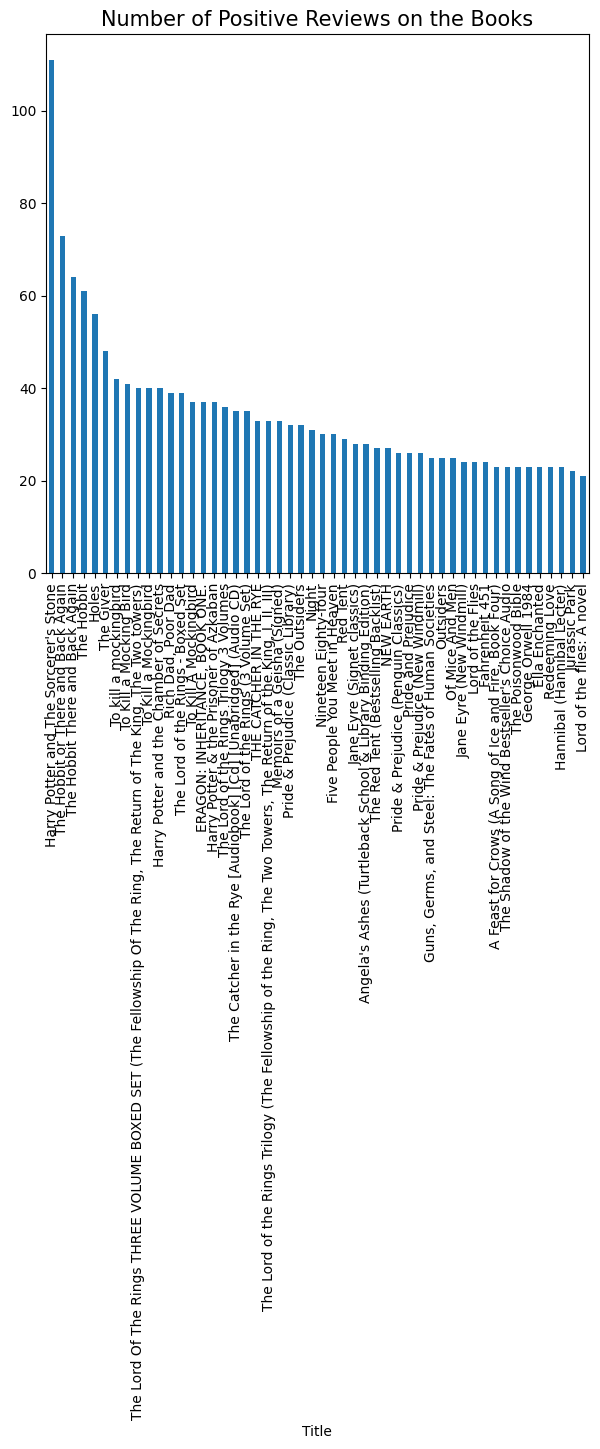

In [18]:
df[df['Sentiment'] == 'positive']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Positive Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Most number of **Neutral** Reviews on the Books

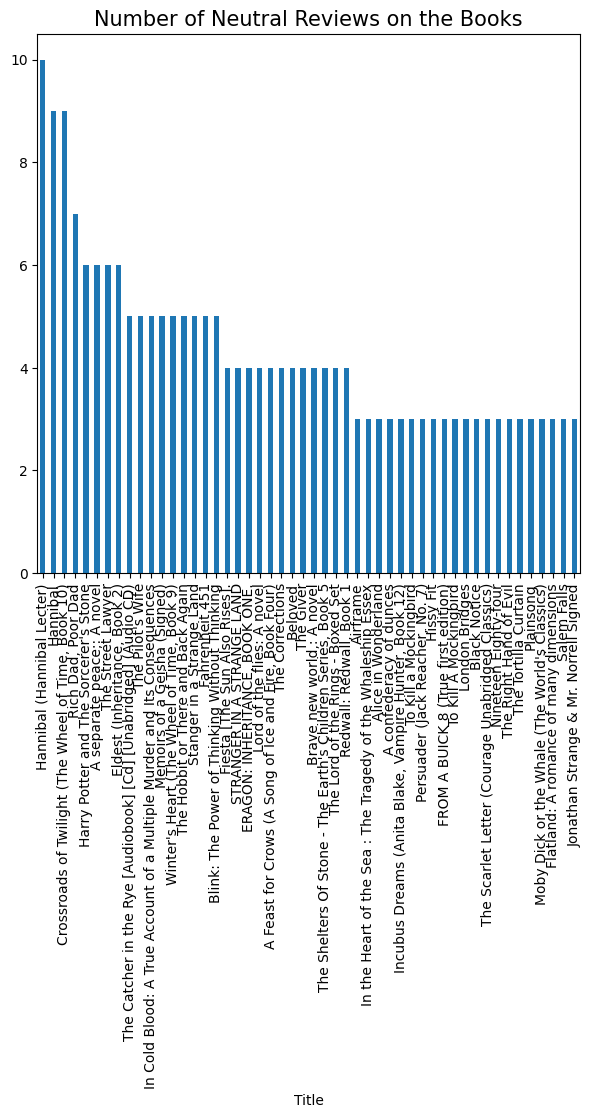

In [19]:
df[df['Sentiment'] == 'neutral']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Neutral Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Most number of **Negative** Reviews on the Books

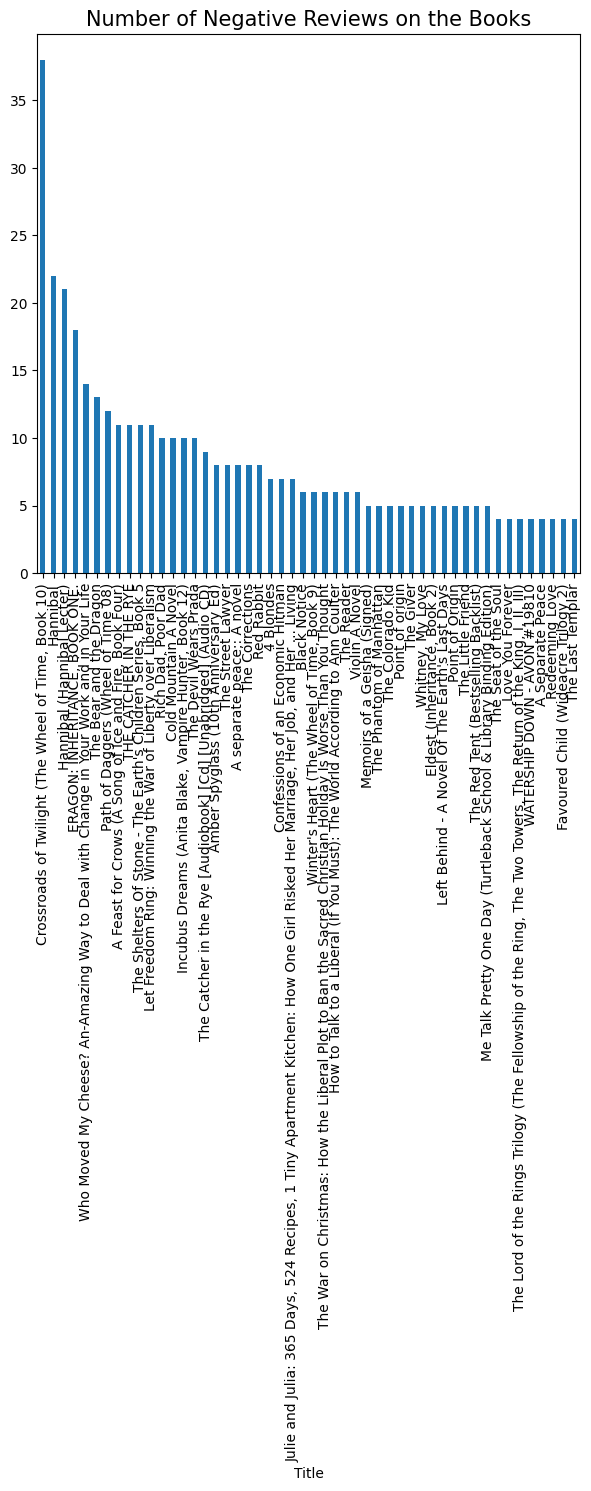

In [20]:
df[df['Sentiment'] == 'negative']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Negative Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Dataframe of Reviews vs Sentiments

In [19]:
reviews_df = df[['review/text', 'Sentiment']]

In [20]:
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
reviews_df['Sentiment'] = reviews_df['Sentiment'].map(sentiment_map)


<ipython-input-20-6f5a857ae686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['Sentiment'] = reviews_df['Sentiment'].map(sentiment_map)


In [22]:
print(reviews_df['Sentiment'].value_counts())


Sentiment
 1    17457
-1     2589
 0     1954
Name: count, dtype: int64


## Dividing Data into x & y

In [21]:
x = reviews_df.drop(['Sentiment'], axis=1)
y = reviews_df['Sentiment']

# **text - preprocessing**

In [23]:
pip install -U nltk

In [24]:
import nltk

In [25]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [26]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re, string, unicodedata
from string import punctuation

In [27]:
pip install --upgrade numpy spacy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


###  Quy trình tiền xử lý văn bản

#### 1️⃣ Mở rộng viết tắt (`expand_contractions`)
Chuyển các từ viết tắt thành dạng đầy đủ để đảm bảo giữ được ngữ nghĩa khi phân tích.  
**Ví dụ**:  
- “can’t” → “cannot”  
- “I’m” → “I am”  
- “won’t” → “will not”

---

#### 2️⃣ Cleaning để chỉ còn toàn từ viết thường

Giúp thống nhất cách viết
---

#### 3️⃣ Lemmatization có xét POS với spaCy (`spacy_lemmatize`)
Chuyển các từ về **dạng gốc (lemma)** nhưng **chỉ giữ** các từ có chức năng:  
- Danh từ (`NOUN`)  
- Động từ (`VERB`)  
- Tính từ (`ADJ`)  
- Trạng từ (`ADV`)  

**Ví dụ**:  
- “believe” → “believe”  
- “chapter” → “chapter”  
- “amazing” → “amazing”

---

#### 4️⃣ Loại bỏ stopwords và token không phải chữ (`final_clean`)
- **Loại bỏ** các từ dừng phổ biến (stopwords), **trừ** các từ phủ định quan trọng như `not`, `no`, `never`, `can't`...
- **Loại bỏ thêm** các từ dư thừa chuyên ngành như: `book`, `author`, `page`, `chapter`.
- **Chỉ giữ lại** các token là **chữ cái** (không chứa số, ký tự đặc biệt...).

---


In [28]:
import re
import html
import nltk
import spacy
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer, SnowballStemmer

# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('words')

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
WORDSET = set(words.words())

def get_custom_stopwords():
    negations = {'not','no','nor','never','none',"don't","won't","can't"}
    sw = set(stopwords.words('english')) - negations
    domain = {'book','chapter','page','author','story','read'}
    return sw.union(domain)
stopword = get_custom_stopwords()

contractions = {
    "don't":"do not","i'm":"i am","it's":"it is",
    "can't":"cannot","won't":"will not"
}


def expand_contractions(text):
    pattern = re.compile(r'\b(' + '|'.join(map(re.escape, contractions.keys())) + r')\b')
    return pattern.sub(lambda m: contractions[m.group(0)], text)

def remove_html(text):
    return re.sub(r'<[^>]+>', '', text)

def remove_urls(text):
    return re.sub(r'http\S+|www\.\S+', '', text)

def remove_emails_mentions_hashtags(text):
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    return text

def remove_special_characters(text):
    # Thay tất cả ký tự không phải số/chữ/space thành space
    return re.sub(r'[^A-Za-z0-9\s]', ' ', text)



NEGATIONS = {'not','no','nor','never','none'}

def spacy_lemmatize(text):
    doc = nlp(text)
    lemmas = []
    for tok in doc:
        low = tok.text.lower()
        if low in NEGATIONS:
            # giữ nguyên phủ định
            lemmas.append(low)
        elif tok.pos_ in {'NOUN','VERB','ADJ','ADV'}:
            lemmas.append(tok.lemma_)
        # else: bỏ các token khác (đã là stopwords, trợ từ,...)
    return ' '.join(lemmas)


def final_clean(text):
    toks = text.split()
    return ' '.join(w for w in toks if w.isalpha() and w not in stopword)

def full_clean(text):
    # 1. HTML entities, contraction, html tags, urls, mentions...
    text = html.unescape(text)
    text = expand_contractions(text)
    text = remove_html(text)
    text = remove_urls(text)
    text = remove_emails_mentions_hashtags(text)

    # 2. Loại ký tự đặc biệt, giữ khoảng trắng
    text = remove_special_characters(text)

    # 3. Lowercase + sửa chính tả
    text = text.lower()

    # 4. Lemmatize (với rule giữ phủ định)
    text = spacy_lemmatize(text)

    # 5. Loại stopwords + non-alpha
    text = final_clean(text)
    return text



# Ví dụ



In [29]:
s = "I read Perfect Husband on my Kindle, and since I'm new to Lisa Gardner, I don't know in what order she's written her books. Halfway through Perfect Husband, I suspected that this was one of her earlier novels. While her current novels are suspense with a capital , this novel is more of a romance novel than anything.So the plot is, Tess, a young woman who wakes up to find the prince charming she married is actually a sadistic man, and worse yet, he's a serial killer. All Tess gained from leaving her abusive father to marry the man of her dreams, is a change of address, and now being trapped in a relationship with a man who kills beautiful, young blondes like herself. Talk about being scared.In respect to Jim Beckett, the husband/serial killer, he's just about the most fascinating killer ever set down on a page. The trouble I had was that his motives were never explained. As evil as Beckett was, we are never privy as to how he got so evil. Now that would have been an intriguing story.Tess, runs from the safe-house the police set up for her after her husband finds her and attempts to kill her. She leaves her 4 year-old daughter with the police to seek out J.T., a man floundering from his own demons, who just might be as troubled as Tess' husband, only instead if taking out his angst on the world, J.T. takes it out on himself. He's an interesting character study. Why does abuse send one person into a world of expressing that hurt on others, while it sends another into rescue mode?There were so many 'bodice-ripper' episodes, that pretty soon I just started skipping over them. Not to offend any romance readers, I certainly spent more than a few years gobbling them up myself, but suspense is my thing now, and usually Gardner is superb. Not that I won't read the rest of her work, because she's so good I can't resist."
print(full_clean(s))

perfect husband kindle new gardner not know order write halfway perfect husband suspect early novel current novel suspense capital novel romance novel plot tess young woman wake find prince marry actually sadistic man bad serial killer tess gain leave abusive father marry man dream change address trap relationship man kill beautiful young blonde talk scared respect killer fascinating killer ever set trouble motive never explain evil never privy get evil intriguing tess run safe house police set husband find attempt kill leave year old daughter police seek man flounder demon trouble tess husband instead take angst world take interesting character study abuse send person world express hurt send rescue mode many bodice ripper episode pretty soon start skip not offend romance reader certainly spend year gobble suspense thing usually gardner superb not not rest work good not resist


In [30]:
x["clean_reviews"] = x["review/text"].apply(full_clean)


In [31]:
pd.set_option('display.max_colwidth', None)

In [32]:
x.head()

,review/text,clean_reviews
0,"This was the best Judy Blume book I've ever read in my entire life. The characters she creates are so realistic and lifelike, and the friendship between Vix and Caitlin made me want to laugh and cry. Every page of the book was a sharp turn---I never knew where it would head next. At first I thought I knew how it would end by reading the prolouge, but there are complexities underneath it. If you are a Judy Blume fan, you must read this book. It could easily be a guide to my life. The transitions between teen and adult is rocky yet smooth at the same time. A must read.",good blume ever entire life character create realistic lifelike friendship make want laugh cry sharp turn never know head next first think know end prolouge complexity blume fan easily guide life transition teen adult rocky yet smooth time
1,"Another hilarious Dilbert compilation. With both color and black and white strips, this book is a must have for any Dilbert enthusiast. Complete with Dogbert's always insightful tips on surviving the work place, and Dilberts quirky ways of getting out of doing any work for his inept manager. This book gives a very disturbing look into corporate America, with Dilbert, Alice, Wally, Dogbert, Ratbert, Pointy Haired Boss, Catbert, Phil the Prince of Insufficient Light, Bob the dinosaur, Dilberts girlfriend Liz, and many more, this book is still just as funny after two or three readings. I highly recomend this book.",hilarious dilbert compilation color black white strip dilbert enthusiast complete always insightful tip survive work place dilbert quirky way get work inept manager give disturbing look corporate dilbert alice wally dogbert ratbert pointy haired boss phil prince insufficient light dinosaur dilbert many still funny reading highly recomend
2,"I have all three books in the Tucker Mills Trilogy! Lori Wick did an excellent job of weaving each character's story in with one another. I also enjoy the ""trickle down effect"" illustrated in these books-when one character received Christ as their Savior, it eventually drew others one at a time, although some struggled with it. With regards to Just Above a Whisper, the themes highlighted in this book are faith, overcoming fear, embracing love and serving in humility. Love this series!",tucker mill wick excellent job weave character also enjoy trickle effect illustrate character receive savior eventually draw time struggle regard whisper theme highlight faith overcome fear embrace love serve humility love series
3,"There was a time when science fiction was a very insignificant genre, enjoyed almost exclusively by boys and young men, a situation that changed somewhat when the Space Age began, demonstrating that even the most far-fetched nonsense could become tomorrow's headline. Light adventure and juvenile novels gave way to ""serious"" science fiction works that actually ""meant something"". Much of this transition took place during the turbulent 1960's, and it is in this context that we should consider Norstrilia.Part One was published in '64, and paints a delightfully barbed portrait of the kind of people who live in Northern Australia - the antecedents of the planet of Norstrilia. In a cosmic irony worthy of Vonnegut, Norstrilia is the only planet that can grow ""stroon"" - the prized longevity drug - making it the richest planet in the galaxy, but it is inhabited by a people who are almost painfully rooted in the past; insular, anti-technology, with strong ties to the land, reverent towards their ancestors as well as the unseen Queen of the Commonwealth, and practicing strict eugenics to preserve the purity of their lineage. This latter almost proves the undoing of the protagonist, Rod McBan the 151st, since he was born with a distinct genetic defect, being unable to communicate via telepathy the way everyone else does.Part Two was published in '68, and is consequently faster-paced, somewhat racier, and distinctly more class-conscious. Rod trave

In [33]:
x.drop('review/text', axis=1, inplace=True)

In [34]:
x[x["clean_reviews"].str.len() == 0]

,clean_reviews
3801,
6026,
9265,


In [35]:
x = x[x["clean_reviews"].str.len() != 0]

In [36]:
y = reviews_df['Sentiment']

In [37]:
y_dropped = y.drop(index=[3801,9265,6026])

# Reset index cho cả x và y
x = x.reset_index(drop=True)
y = y_dropped.reset_index(drop=True)

In [143]:
x.to_csv('x_new.csv', index=False)
y.to_csv('y_new.csv', index=False)


### Train-test split

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

### WordClound

In [41]:
def generate_wordcloud(text,Title):
    all_text = " ".join(text)
    wordcloud = WordCloud(width=800,
                          height=400,
                          background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

In [42]:
train_df = pd.DataFrame({'Cleaned_sentence': x_train['clean_reviews'], 'sentiment': y_train})
train_df

,Cleaned_sentence,sentiment
20869,realize take seriously fine suppose light good action scene early comedy lame character dimensional write wealthy californian never seem job iq dog,-1
19836,good fifth love writing good favourite,1
900,love female fantasy bellydancer princess want know recommend say love hesitation hype worry live expectation not worry wonder go open small dreary fishing village start put description costume life geisha intricatly weave beautiful woman grow care deeply,1
2279,recipe remember child lot convenience food use well make dinnertime little easy need time day also interesting recipe really ingenius fun,1
4446,item not order not receive hope whomever receive love,-1
...,...,...
11964,initially investigate house dead interested see treatment prison life time reveal interesting find lack real storyline thread call novel see collection short day day interaction prisoner well separation define noble man blue collar man segregate clique interesting still not good work easy foray still not good example writing storytelling skill,0
21575,not many hear chronicle prydain unfortunate young reader get well remember snuggle bed eye take time not put beginning fabulous quest take taran psychic pig henwyn meet great character face evil horn king buy kid great time,1
5390,accessible sensible look conflict readable excellent job debunk many myth propaganda surround struggle cramer provide extensive background history involve yet turn boring recitation criticize israeli palestinian leadership equally responsibilite lack progress yet clearly side say israeli occupation cause horror personal personal experience region add humanizing element connect conflict effect real people hopefully get people talk honestly openly bad human right issue past year think cramer deserve pulitzer judge,1
860,european founder ethology study natural behavior animal environment co award precede body work create new scientific discipline extremely significant course american psychology time grow increasingly dominate learn theory laboratory method american psychology influence achievement physics medicine preferred study behavior control laboratory condition mean get near ultimate truth time think almost always involve learn core accord principle theory famous american learn theorist hull comparative psychology american branch study similarity difference animal specie control problem laboratory setting greatly prefer observation behavior valuable design later lab experiment consider less rigorous truth lorenz tinbergen european naturalist colleague report significant child observation emperor new clothe truth significant lack reveal laboratory method not examine reveal important aspect animal behavior lab method obscure eliminate behavior occur natural setting lorenz tinbergen discover explore bring imprint attention scientific behavioral world imprinting last often irreversible effect early experience occur critical period development later behavior animal contrast view normal learning theory find strength response mainly function number practice trial work understand language bee king ring significant contribution enable lie people understand importance observation prepare sometimes excite begin student behavioral science take psychology new direction year learn theory no long form spinal column much skeletal structure american psychology psychology graduate student year laboratory instructor university professor comparative psychology exciting time see old truth axiom become overthrown help search new one ring still delightful interesting incline reader look different eye behavior animal friend possibly keep current research dog think weak covenant ch dog decide domestic dog descend jackal also descend wolf advance thesis describe detail dichotomy personality behavior antecedent lead commonly find descendent wrong last year become increasingly certain almost domestic dog descend wolf lorenz speculate incorrect premise proceed elaborate char

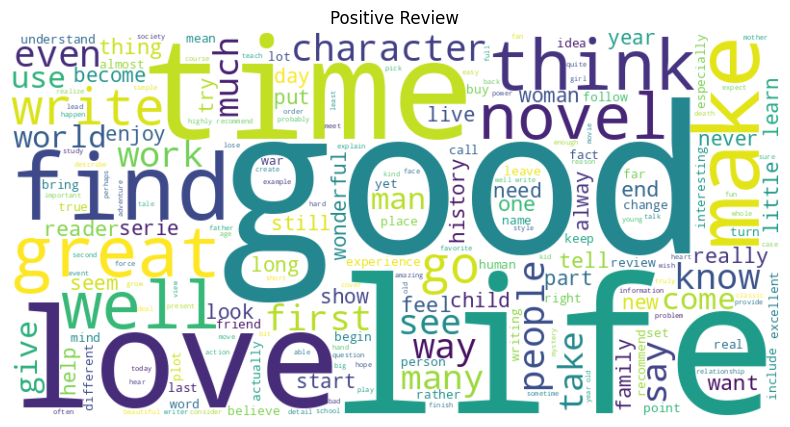

In [46]:
positive = train_df[train_df['sentiment']==1]['Cleaned_sentence'].tolist()
generate_wordcloud(positive,'Positive Review')

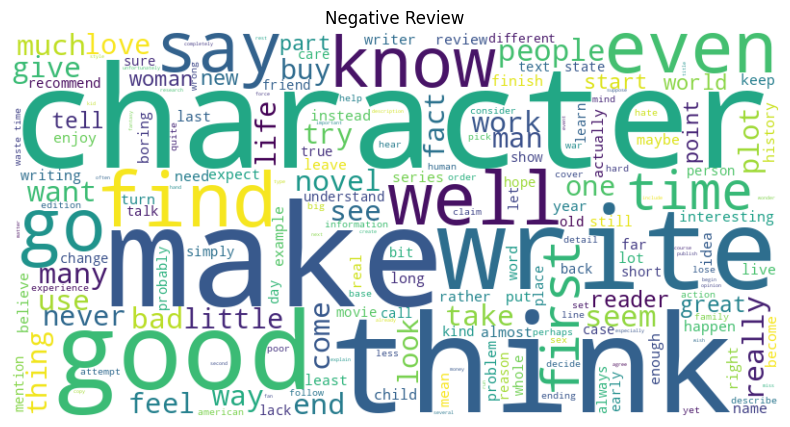

In [44]:
negative = train_df[train_df['sentiment']==-1]['Cleaned_sentence'].tolist()
generate_wordcloud(negative,'Negative Review')

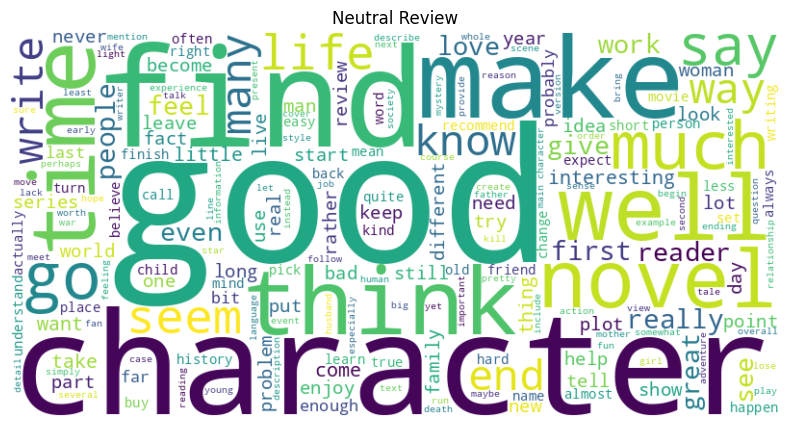

In [45]:
neutral = train_df[train_df['sentiment']==0]['Cleaned_sentence'].tolist()
generate_wordcloud(neutral,'Neutral Review')

### Feature engineering

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9,        # Giảm từ 0.9 → 0.85 để loại bỏ thêm từ phổ biến
    min_df=10,           # Tăng từ 3 → 5 để lọc từ hiếm mạnh hơn
    ngram_range=(1, 1), # Chỉ dùng unigram (trừ khi bigram thực sự cần)
    sublinear_tf=True   # Dùng log(TF) để giảm ảnh hưởng của tần suất cao
)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['clean_reviews'])

# Transform the 'clean_reviews' column on the testing data
x_test_tfidf = tfidf_vectorizer.transform(x_test['clean_reviews'])

In [49]:
x_train_tfidf.shape

(17597, 7379)

In [50]:
x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray())
x_test_tfidf_df =  pd.DataFrame(x_test_tfidf.toarray())

## Balancing Data

### Using Oversampling for Balancing Data

In [51]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_train_bal, y_train_bal = ros.fit_resample(x_train_tfidf, y_train)
print(y_train_bal.value_counts())


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a8b380c7060>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e

Sentiment
-1    13937
 1    13937
 0    13937
Name: count, dtype: int64


## Dimension reduction

In [158]:
type(y_train_bal)

pandas.core.series.Series

In [52]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=500, random_state=42)
x_train_selected = svd.fit_transform(x_train_bal)
x_test_selected = svd.transform(x_test_tfidf)


In [160]:
x_train_selected

array([[ 0.12834904,  0.02305001,  0.08007444, ...,  0.00123824,
         0.00158721,  0.0074377 ],
       [ 0.09454312,  0.1254026 , -0.04088127, ..., -0.00837504,
        -0.00127684,  0.00143637],
       [ 0.14382977,  0.01133274,  0.00484096, ..., -0.02017404,
         0.01575322,  0.0327605 ],
       ...,
       [ 0.25371805, -0.06347671, -0.0417143 , ...,  0.00122831,
        -0.03103424, -0.00047915],
       [ 0.11802119, -0.06243014,  0.01647718, ...,  0.01898694,
         0.01451973, -0.04364743],
       [ 0.17083787,  0.03495707, -0.20595923, ...,  0.00455816,
        -0.01422677,  0.02362494]], shape=(41811, 500))

## **Model Training**

## 1) Logistic Regression

### Applying Logistic Regression on Imbalanced Data

> Add blockquote



In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [162]:
log = LogisticRegression()
log.fit(x_train_tfidf_df, y_train)

LogisticRegression()

In [163]:
perd_log=log.predict(x_test_tfidf_df)

In [164]:
print(classification_report(perd_log, y_test))

              precision    recall  f1-score   support

          -1       0.41      0.71      0.52       289
           0       0.06      0.45      0.11        56
           1       0.98      0.85      0.91      4055

    accuracy                           0.84      4400
   macro avg       0.49      0.67      0.52      4400
weighted avg       0.93      0.84      0.88      4400



### Applying Logistic Regression on Balanced Data

In [165]:
log_bal = LogisticRegression()
log_bal.fit(x_train_bal, y_train_bal)

LogisticRegression()

In [166]:
perd_log_bal =log_bal.predict(x_test_tfidf_df)

In [167]:
print(classification_report(perd_log_bal, y_test))

              precision    recall  f1-score   support

          -1       0.63      0.47      0.54       659
           0       0.38      0.24      0.29       626
           1       0.82      0.92      0.87      3115

    accuracy                           0.76      4400
   macro avg       0.61      0.54      0.57      4400
weighted avg       0.73      0.76      0.74      4400



In [168]:
from sklearn.metrics import confusion_matrix

In [169]:
confusion_matrix(y_test,perd_log_bal)

array([[ 311,   91,   95],
       [  98,  148,  140],
       [ 250,  387, 2880]])

In [170]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

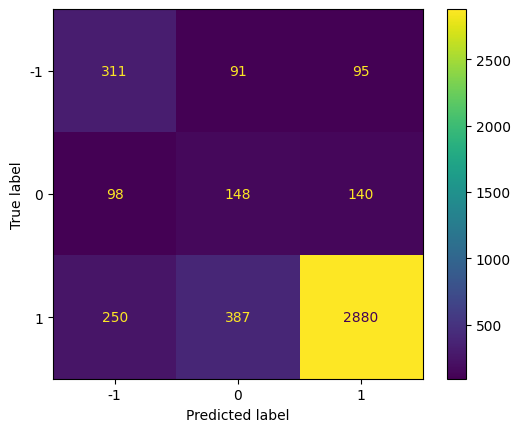

In [171]:
cm = confusion_matrix(y_test, perd_log_bal, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

### Applying Logistic Regression on Dimension Reduction Data

> Add blockquote



In [172]:
log_svd = LogisticRegression()
log_svd.fit(x_train_selected, y_train_bal)

LogisticRegression()

In [173]:
perd_log_svd =log_svd.predict(x_test_selected)

In [174]:
print(classification_report(perd_log_svd, y_test))

              precision    recall  f1-score   support

          -1       0.65      0.43      0.52       743
           0       0.45      0.21      0.28       851
           1       0.75      0.94      0.83      2806

    accuracy                           0.71      4400
   macro avg       0.62      0.53      0.55      4400
weighted avg       0.68      0.71      0.67      4400



## 2) Decision Tree

### Decision tree on imbalanced Data

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier.fit(x_train_tfidf_df, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [177]:
pred_tre = classifier.predict(x_test_tfidf_df)

In [178]:
print(classification_report(pred_tre, y_test))

              precision    recall  f1-score   support

          -1       0.32      0.35      0.34       455
           0       0.16      0.16      0.16       380
           1       0.86      0.85      0.85      3565

    accuracy                           0.74      4400
   macro avg       0.45      0.45      0.45      4400
weighted avg       0.74      0.74      0.74      4400



In [179]:
confusion_matrix(y_test,pred_tre)

array([[ 160,   66,  271],
       [  56,   61,  269],
       [ 239,  253, 3025]])

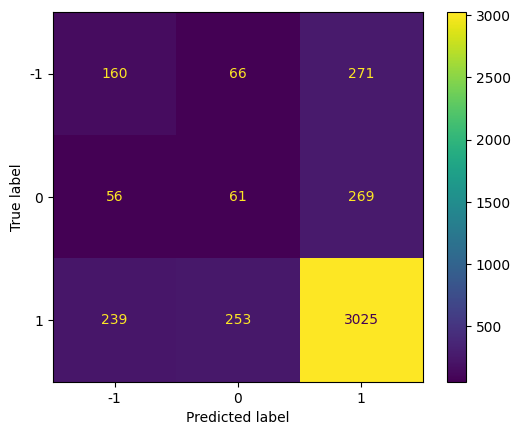

In [180]:
cm = confusion_matrix(y_test, pred_tre, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

### Decision tree on balanced data

In [181]:
classifier_bal= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier_bal.fit(x_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [182]:
pred_tre_bal = classifier_bal.predict(x_test_tfidf_df)

In [183]:
print(classification_report(pred_tre_bal, y_test))

              precision    recall  f1-score   support

          -1       0.32      0.29      0.31       538
           0       0.17      0.14      0.15       473
           1       0.81      0.84      0.83      3389

    accuracy                           0.70      4400
   macro avg       0.43      0.42      0.43      4400
weighted avg       0.68      0.70      0.69      4400



In [184]:
confusion_matrix(y_test,pred_tre_bal)

array([[ 158,   60,  279],
       [  68,   64,  254],
       [ 312,  349, 2856]])

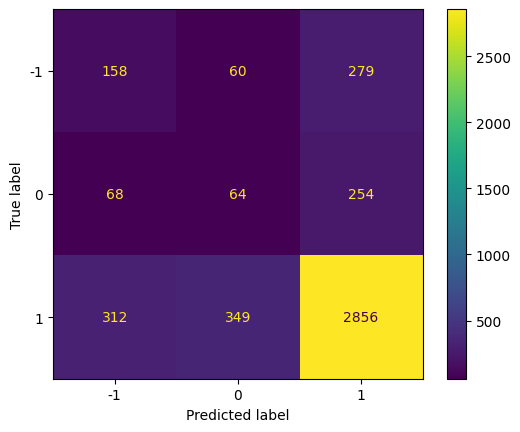

In [185]:
cm = confusion_matrix(y_test, pred_tre_bal, labels=classifier_bal.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier_bal.classes_)
disp.plot()

### Decision tree on dimension reduction data

In [186]:
classifier_svd = DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier_svd.fit(x_train_selected, y_train_bal)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [187]:
pred_tre_svd = classifier_svd.predict(x_test_selected)

In [188]:
print(classification_report(pred_tre_svd, y_test))

              precision    recall  f1-score   support

          -1       0.28      0.28      0.28       498
           0       0.10      0.12      0.11       340
           1       0.85      0.84      0.84      3562

    accuracy                           0.72      4400
   macro avg       0.41      0.41      0.41      4400
weighted avg       0.73      0.72      0.72      4400



In [189]:
confusion_matrix(y_test,pred_tre_svd)

array([[ 140,   49,  308],
       [  76,   40,  270],
       [ 282,  251, 2984]])

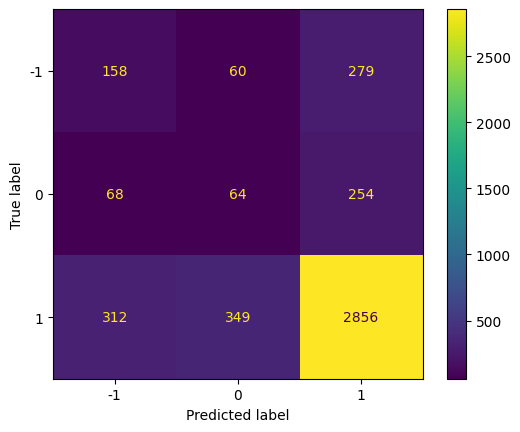

In [190]:
cm = confusion_matrix(y_test, pred_tre_bal, labels=classifier_bal.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier_bal.classes_)
disp.plot()

## 3) Naive Bayes

### Naive bayes on imbalanced Data

In [191]:
from sklearn.naive_bayes import ComplementNB

nb_clf = ComplementNB()
nb_clf.fit(x_train_tfidf_df, y_train)

# 3. Đánh giá trên tập test (cũng là sparse TF-IDF)
pred_nb = nb_clf.predict(x_test_tfidf)

In [192]:
print(classification_report(pred_nb, y_test))

              precision    recall  f1-score   support

          -1       0.63      0.43      0.51       731
           0       0.13      0.26      0.18       196
           1       0.89      0.90      0.89      3473

    accuracy                           0.79      4400
   macro avg       0.55      0.53      0.53      4400
weighted avg       0.81      0.79      0.80      4400



### Naive Bayes on Balanced Data

In [193]:
from sklearn.naive_bayes import ComplementNB

nb_clf = ComplementNB()
nb_clf.fit(x_train_bal, y_train_bal)

# 3. Đánh giá trên tập test (cũng là sparse TF-IDF)
pred_nb_bal = nb_clf.predict(x_test_tfidf)

In [194]:
print(classification_report(pred_nb_bal, y_test))

              precision    recall  f1-score   support

          -1       0.64      0.41      0.50       775
           0       0.32      0.19      0.24       643
           1       0.78      0.92      0.84      2982

    accuracy                           0.72      4400
   macro avg       0.58      0.51      0.53      4400
weighted avg       0.69      0.72      0.69      4400



## 4) SVM

### SVM on Imbalance Data

In [195]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    C=0.1,                      # giảm C để regularization mạnh hơn, giảm overfitting
    class_weight='balanced',   # xử lý mất cân bằng giữa các lớp
    max_iter=3000,             # tăng số vòng lặp để mô hình hội tụ
    dual=True            # True nếu n_samples > n_features, False nếu ngược lại
)


In [196]:
svm_model.fit(x_train_tfidf_df, y_train)

# 3. Đánh giá trên tập test (cũng là sparse TF-IDF)
pred_svm = svm_model.predict(x_test_tfidf)

In [197]:
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

          -1       0.57      0.59      0.58       473
           0       0.25      0.36      0.30       274
           1       0.93      0.90      0.91      3653

    accuracy                           0.83      4400
   macro avg       0.58      0.62      0.60      4400
weighted avg       0.85      0.83      0.84      4400



### SVM on Balanced Data

In [198]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    C=0.1,                      # giảm C để regularization mạnh hơn, giảm overfitting
    max_iter=3000,             # tăng số vòng lặp để mô hình hội tụ
    dual=True                 # True nếu n_samples > n_features, False nếu ngược lại
)


In [199]:
svm_model.fit(x_train_bal, y_train_bal)

# 3. Đánh giá trên tập test (cũng là sparse TF-IDF)
pred_svm_bal = svm_model.predict(x_test_tfidf)

In [200]:
print(classification_report(pred_svm_bal, y_test))

              precision    recall  f1-score   support

          -1       0.64      0.47      0.54       669
           0       0.39      0.24      0.30       628
           1       0.82      0.93      0.87      3103

    accuracy                           0.76      4400
   macro avg       0.62      0.55      0.57      4400
weighted avg       0.73      0.76      0.74      4400



### SVM on Dimension reduction Data

In [201]:
from sklearn.svm import LinearSVC

svm_model_svd = LinearSVC(
    C=0.1,                      # giảm C để regularization mạnh hơn, giảm overfitting
    max_iter=3000,             # tăng số vòng lặp để mô hình hội tụ
    dual=True                 # True nếu n_samples > n_features, False nếu ngược lại
)


In [202]:
svm_model_svd.fit(x_train_selected, y_train_bal)

pred_svm_svd = svm_model_svd.predict(x_test_selected)
print(classification_report(pred_svm_svd, y_test))


              precision    recall  f1-score   support

          -1       0.67      0.44      0.53       761
           0       0.44      0.21      0.28       804
           1       0.75      0.94      0.84      2835

    accuracy                           0.72      4400
   macro avg       0.62      0.53      0.55      4400
weighted avg       0.68      0.72      0.68      4400



## 5) RandomForest

### RandomForest on Imbalanced Data

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
x_train_tfidf_df.shape

(17597, 7379)

In [205]:
x_test_tfidf_df.shape

(4400, 7379)

In [206]:
ran = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,                # Giới hạn độ sâu để tránh overfit
    max_features='sqrt',         # sqrt(#features) ≈ chỉ dùng ~109/11812 features mỗi split
    class_weight='balanced_subsample',  # Tự cân (trên mỗi bootstrap sample)
    random_state=42,
    n_jobs=-1)

In [207]:
ran.fit(x_train_tfidf_df,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       n_jobs=-1, random_state=42)

In [208]:
perd_ran=ran.predict(x_test_tfidf_df)

In [209]:
perd_ran.shape

(4400,)

In [210]:
confusion_matrix(y_test,perd_ran)

array([[ 240,   23,  234],
       [  72,   42,  272],
       [ 157,  101, 3259]])

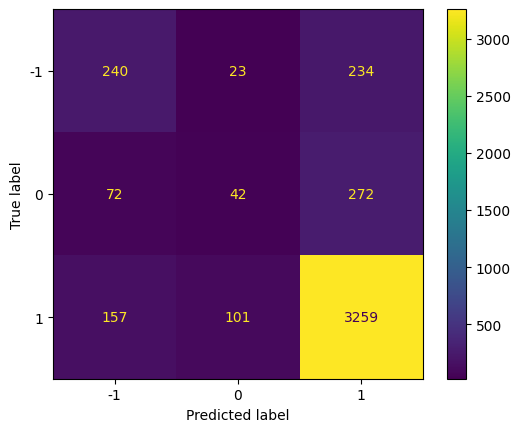

In [211]:
cm = confusion_matrix(y_test, perd_ran, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [212]:
y_test.shape , perd_ran.shape

((4400,), (4400,))

In [213]:
print(classification_report(perd_ran, y_test))

              precision    recall  f1-score   support

          -1       0.48      0.51      0.50       469
           0       0.11      0.25      0.15       166
           1       0.93      0.87      0.90      3765

    accuracy                           0.80      4400
   macro avg       0.51      0.54      0.51      4400
weighted avg       0.85      0.80      0.82      4400



### RandomForest on balanced Data

In [214]:
ran_bal = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,                # Giới hạn độ sâu để tránh overfit
    max_features='sqrt',         # sqrt(#features) ≈ chỉ dùng ~109/11812 features mỗi split
    class_weight='balanced_subsample',  # Tự cân (trên mỗi bootstrap sample)
    random_state=42,
    n_jobs=-1)
ran_bal.fit(x_train_bal,y_train_bal)
perd_ran_bal=ran_bal.predict(x_test_tfidf_df)

In [215]:
confusion_matrix(y_test,perd_ran_bal)

array([[ 267,   51,  179],
       [  76,  103,  207],
       [ 223,  232, 3062]])

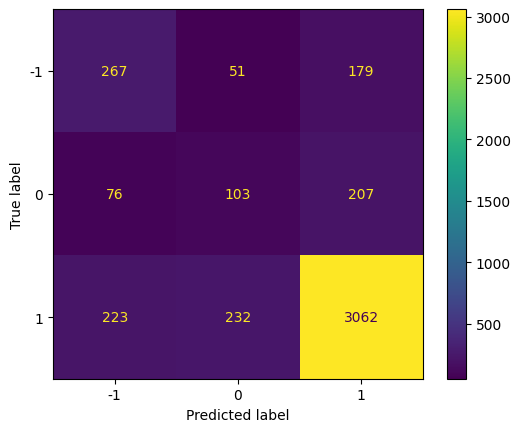

In [216]:
cm = confusion_matrix(y_test, perd_ran_bal, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [217]:
print(classification_report(perd_ran_bal, y_test))

              precision    recall  f1-score   support

          -1       0.54      0.47      0.50       566
           0       0.27      0.27      0.27       386
           1       0.87      0.89      0.88      3448

    accuracy                           0.78      4400
   macro avg       0.56      0.54      0.55      4400
weighted avg       0.77      0.78      0.78      4400



### RandomForrest on Dimension reduction

In [218]:
ran_svd = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,                # Giới hạn độ sâu để tránh overfit
    max_features='sqrt',
    class_weight='balanced_subsample',  # Tự cân (trên mỗi bootstrap sample)
# sqrt(#features) ≈ chỉ dùng ~109/11812 features mỗi split
    random_state=42,
    n_jobs=-1)
ran_svd.fit(x_train_selected,y_train_bal)
perd_ran_svd=ran_svd.predict(x_test_selected)

In [219]:
confusion_matrix(y_test,perd_ran_svd)

array([[  42,    0,  455],
       [   5,    1,  380],
       [  12,    0, 3505]])

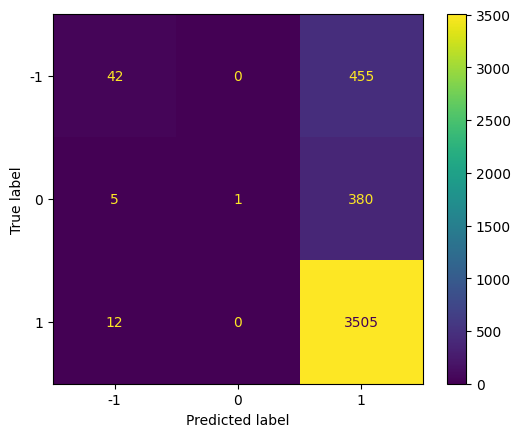

In [220]:
cm = confusion_matrix(y_test, perd_ran_svd, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [221]:
print(classification_report(perd_ran_svd, y_test))

              precision    recall  f1-score   support

          -1       0.08      0.71      0.15        59
           0       0.00      1.00      0.01         1
           1       1.00      0.81      0.89      4340

    accuracy                           0.81      4400
   macro avg       0.36      0.84      0.35      4400
weighted avg       0.98      0.81      0.88      4400



### Saving the best model

In [222]:
import pickle

In [223]:
pickle.dump(log_bal, open('log_bal.pkl','wb'))

In [224]:
with open('log_bal','wb') as f:
  pickle.dump(log_bal,f)

In [225]:
with open('log_bal','rb') as f:
  mp=pickle.load(f)

In [226]:
def predict(text):
  input_text = [text]
  text_to_vec = tfidf_vectorizer.transform(input_text).toarray()
  prediction = mp.predict(text_to_vec)
  return prediction

In [ ]:
User_input = input("Enter your text:")
output = predict(User_input)
print(output)